In [1]:
# Imports

# Libraries
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Local stuff
from branches import *
from panda_helpers import *
from helpers import *

In [4]:
# Define the path to the file you want to open

# Make sure it is a __flat__ CAF file!!!
filename = "/pnfs/sbnd/persistent/sbndpro/mcp/mc/official/MCP2022A/prodoverlay_corsika_cosmics_proton_genie_rockbox_sce/v09_37_02_04/reco2_caf/flat_caf_112-0451e666-602c-432e-855e-a82cde1f1f35.root"

In [5]:
# open it in uproot

tname = "recTree"
events = uproot.open(filename + ":" + tname)

In [6]:
# Now we have a TTree!

events

<TTree 'recTree' (1545 branches) at 0x7f00344f0850>

In [7]:
# Take some branches and load them into a pandas "data frame"

# What is a data frame?
# It is the way that pandas represents data. It works a lot like an excel spreedsheet or a SQL database.
# Each row of the data frame is a thing. That thing can have a number of different values, which are represented
# by columns.

# So, for example. We can make a neutrino data frame. Each row of the data frame is a neutrino. A neutrino
# has a bunch of different values like its Energy, interaction vertex, etc.

# mcbranches: a bunch of branch names that provide information on the neutrino interaction 
nudf = events.arrays(mcbranches, library="pd")

In [8]:
# The data frame!!

# "entry" corresponds to the spill. And "subentry" corresponds to the index of the neutr
nudf

rec.mc.nu.E  rec.mc.nu.position.x  rec.mc.nu.position.y  \
entry subentry                                                            
0     0            0.940681           -584.593567            245.041122   
      1            0.896295              8.005111             -7.561608   
1     0            3.956313            -68.982361           -140.322510   
      1            1.277367           -208.679321             35.178295   
      2            0.395579            474.114868            313.314972   
...                     ...                   ...                   ...   
2767  1            0.691947           -156.695847            -82.170418   
2768  0            1.208528           -199.727173              5.899607   
2769  0            0.722863            123.196190            140.274200   
2770  0            0.716736            156.997635            107.968300   
2771  0            1.269023            125.427917            -58.416622   

                rec.mc.nu.position.z  rec.mc.nu.pdg  rec.mc.nu.iscc  
entry subentry                                                       
0     0                   229.196503             14               1  
      1                   359.866394             14               0  
1     0                   512.446350             14               1  
      1                  -473.911743             14               1  
      2                    11.619415             14               1  
...                              ...            ...             ...  
2767  1                    37.647198             14               1  
2768  0                   479.121429             14               1  
2769  0                   169.813690             14               1  
2770  0                   360.384064             14               0  
2771  0                   -25.419466             14               1  

[4974 rows x 6 columns]

Text(0, 0.5, 'Entries')

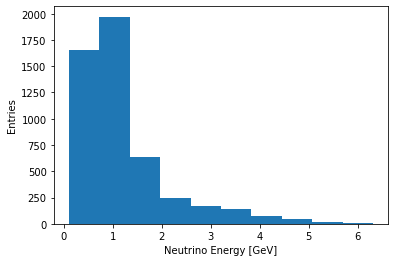

In [9]:
# Make a plot!
_ = plt.hist(nudf["rec.mc.nu.E"])
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("Entries")

In [10]:
# How do we access more complex data?

# The CAF files have information we need to do event selection type analysis with. That is a lot of information. 
# Stuff like:
# -True neutrino interactions
# -True G4 particles
# -Reconstructed tracks
# -Reconstructed showers
# -CRT matching
# -PMT matching
# -Reco-to-Truth matching
# -...and more

# How do we handle this data in pandas, where every row is a thing?

# Two complexities:
# 1. We cannot combine (for example) reconstructed tracks and true neutrinos in the same data frame. Every row can
#    be a track, or every row can be a neutrino. But every row cannot be a track/neutrino thing.
#
#    So we are going to start out with separate data frame for each thing, and then build them together into a
#    single data frame that has all the information we need.
#
# 2. We need to handle nested data. A single spill might have multiple neutrinos. Or a single spill might have
#    multiple reconstructed slices, which have multiple reconstructed tracks, which have multiple truth-matched
#    paricles, etc.
# 
#    In C++, this is represented as a bunch of nested vectors. In pandas, we can use a __MultiIndex__. This is 
#    a very powerful pandas construct that lets us represent nested data

In [11]:
# In order to handle nested data, I have a helper function that parses the FLAT CAF structure

# delete the old nudf
del nudf
nudf = loadbranches(events, mcbranches)
slcdf = loadbranches(events, slcbranches)
trkdf = loadbranches(events, trkbranches)

In [12]:
# The neutrino data frame!
nudf

rec.mc.nu.E  rec.mc.nu.position.x  \
entry rec.mc.nu..index                                      
0     0                    0.940681           -584.593567   
      1                    0.896295              8.005111   
1     0                    3.956313            -68.982361   
      1                    1.277367           -208.679321   
      2                    0.395579            474.114868   
...                             ...                   ...   
2767  1                    0.691947           -156.695847   
2768  0                    1.208528           -199.727173   
2769  0                    0.722863            123.196190   
2770  0                    0.716736            156.997635   
2771  0                    1.269023            125.427917   

                        rec.mc.nu.position.y  rec.mc.nu.position.z  \
entry rec.mc.nu..index                                               
0     0                           245.041122            229.196503   
      1                            -7.561608            359.866394   
1     0                          -140.322510            512.446350   
      1                            35.178295           -473.911743   
      2                           313.314972             11.619415   
...                                      ...                   ...   
2767  1                           -82.170418             37.647198   
2768  0                             5.899607            479.121429   
2769  0                           140.274200            169.813690   
2770  0                           107.968300            360.384064   
2771  0                           -58.416622            -25.419466   

                        rec.mc.nu.pdg  rec.mc.nu.iscc  
entry rec.mc.nu..index                                 
0     0                            14               1  
      1                            14               0  
1     0                            14               1  
      1                            14               1  
      2                            14               1  
...                               ...             ...  
2767  1                            14               1  
2768  0                            14               1  
2769  0                            14               1  
2770  0                            14               0  
2771  0                            14               1  

[4974 rows x 6 columns]

In [13]:
# The slice data frame!
slcdf

rec.slc.charge  rec.slc.vertex.x  rec.slc.vertex.y  \
entry rec.slc..index                                                       
0     0                 3.402823e+38         79.662437        -16.618870   
      1                 3.402823e+38         16.960104        -16.154673   
      2                 3.402823e+38        -23.143448        203.333801   
      3                 3.402823e+38        -12.372738        178.746170   
      4                 3.402823e+38        -51.440487        204.688461   
...                              ...               ...               ...   
2770  4                 3.402823e+38         56.233780       -203.076675   
2771  0                 3.402823e+38        140.761017        -85.549110   
      1                 3.402823e+38        118.967911        182.477005   
      2                 3.402823e+38        -29.728001        205.006088   
      3                 3.402823e+38       -232.862213         -3.761062   

                      rec.slc.vertex.z  rec.slc.self  rec.slc.tmatch.eff  \
entry rec.slc..index                                                       
0     0                       3.645125            41                 NaN   
      1                     373.886505            40            0.559702   
      2                     295.167572             0                 NaN   
      3                     510.530029             1                 NaN   
      4                     464.692261             3                 NaN   
...                                ...           ...                 ...   
2770  4                     331.231476             4                 NaN   
2771  0                       4.780899            15            0.958125   
      1                     343.298370            14                 NaN   
      2                     143.695679             0                 NaN   
      3                     171.446243             1                 NaN   

                      rec.slc.tmatch.pur  rec.slc.tmatch.index  \
entry rec.slc..index                                             
0     0                              NaN                  -999   
      1                         0.916363                     1   
      2                              NaN                  -999   
      3                              NaN                  -999   
      4                              NaN                  -999   
...                                  ...                   ...   
2770  4                              NaN                  -999   
2771  0                         0.975834                     0   
      1                              NaN                  -999   
      2                              NaN                  -999   
      3                              NaN                  -999   

                      rec.slc.producer  rec.slc.nu_score  
entry rec.slc..index                                      
0     0                              0          0.471248  
      1                              0          0.628609  
      2                              0         -1.000000  
      3                              0         -1.000000  
      4                              0         -1.000000  
...                                ...               ...  
2770  4                              0         -1.000000  
2771  0                              0          0.432571  
      1                              0          0.484329  
      2                              0         -1.000000  
      3                              0         -1.000000  

[25097 rows x 10 columns]

In [14]:
# The track data frame!
trkdf

rec.slc.reco.trk.pfp.parent_is_primary  \
entry rec.slc..index rec.slc.reco.trk..index                                           
0     0              0                                                             1   
      1              0                                                             1   
      2              0                                                             1   
      3              0                                                             1   
      4              0                                                             1   
...                                                                              ...   
2771  0              0                                                             1   
                     1                                                             1   
      1              0                                                             1   
      2              0                                                             1   
      3              0                                                             1   

                                              rec.slc.reco.trk.pfp.slcID  \
entry rec.slc..index rec.slc.reco.trk..index                               
0     0              0                                                41   
      1              0                                                40   
      2              0                                                 0   
      3              0                                                 1   
      4              0                                                 3   
...                                                                  ...   
2771  0              0                                                15   
                     1                                                15   
      1              0                                                14   
      2              0                                                 0   
      3              0                                                 1   

                                              rec.slc.reco.trk.pfp.parent  \
entry rec.slc..index rec.slc.reco.trk..index                                
0     0              0                                                 41   
      1              0                                                 40   
      2              0                                                 -1   
      3              0                                                 -1   
      4              0                                                 -1   
...                                                                   ...   
2771  0              0                                                 15   
                     1                                                 15   
      1              0                                                 14   
      2              0                                                 -1   
      3              0                                                 -1   

                                              rec.slc.reco.trk.ID  \
entry rec.slc..index rec.slc.reco.trk..index                        
0     0              0                                -2147483648   
      1              0                                -2147483648   
      2              0                                -2147483648   
      3              0                                -2147483648   
      4              0                                -2147483648   
...                                                           ...   
2771  0              0                                -2147483648   
                     1                                -2147483648   
      1              0                                -2147483648   
      2              0                                -2147483648   
      3              0                                -2147483648   

            

In [15]:
# Now, we are going to a quick bit of the numu Event selection.

# First, we can look at some reconstructed variables and compare them for neutrino-slices and cosmic-slices.
# To do this, we need to merge the neutrino data frame into the slice data frame using truth matching.

# We can do this with a "merge"

# Cut on the truth matching -- require the slice contains more than half of the deposited neutrino energy.
# This ensures that each neutrino can only have one reconstructed slice match
slc_has_nu_match = slcdf["rec.slc.tmatch.eff"] > 0.5

# Ignore index matches where the efficiency cut fails
slcdf.loc[np.invert(slc_has_nu_match) & (slcdf["rec.slc.tmatch.index"] >= 0), "rec.slc.tmatch.index"] = np.nan

matchdf = pd.merge(slcdf.reset_index(), # Merging can mess with the multi-index -- we'll fix this later
                 nudf.reset_index(),
                 left_on=["entry", "rec.slc.tmatch.index"], # Match on the entry number than the neutrino index
                 right_on=["entry", "rec.mc.nu..index"], 
                 how="left", # Keep every slice
                 )

matchdf = matchdf.set_index(["entry", "rec.slc..index"], verify_integrity=True)

# check that each neutrino matches to only one slice
assert(matchdf.groupby(["entry", "rec.mc.nu..index"])["rec.slc.charge"].count().max() == 1)

In [16]:
matchdf

rec.slc.charge  rec.slc.vertex.x  rec.slc.vertex.y  \
entry rec.slc..index                                                       
0     0                 3.402823e+38         79.662437        -16.618870   
      1                 3.402823e+38         16.960104        -16.154673   
      2                 3.402823e+38        -23.143448        203.333801   
      3                 3.402823e+38        -12.372738        178.746170   
      4                 3.402823e+38        -51.440487        204.688461   
...                              ...               ...               ...   
2770  4                 3.402823e+38         56.233780       -203.076675   
2771  0                 3.402823e+38        140.761017        -85.549110   
      1                 3.402823e+38        118.967911        182.477005   
      2                 3.402823e+38        -29.728001        205.006088   
      3                 3.402823e+38       -232.862213         -3.761062   

                      rec.slc.vertex.z  rec.slc.self  rec.slc.tmatch.eff  \
entry rec.slc..index                                                       
0     0                       3.645125            41                 NaN   
      1                     373.886505            40            0.559702   
      2                     295.167572             0                 NaN   
      3                     510.530029             1                 NaN   
      4                     464.692261             3                 NaN   
...                                ...           ...                 ...   
2770  4                     331.231476             4                 NaN   
2771  0                       4.780899            15            0.958125   
      1                     343.298370            14                 NaN   
      2                     143.695679             0                 NaN   
      3                     171.446243             1                 NaN   

                      rec.slc.tmatch.pur  rec.slc.tmatch.index  \
entry rec.slc..index                                             
0     0                              NaN                -999.0   
      1                         0.916363                   1.0   
      2                              NaN                -999.0   
      3                              NaN                -999.0   
      4                              NaN                -999.0   
...                                  ...                   ...   
2770  4                              NaN                -999.0   
2771  0                         0.975834                   0.0   
      1                              NaN                -999.0   
      2                              NaN                -999.0   
      3                              NaN                -999.0   

                      rec.slc.producer  rec.slc.nu_score  rec.mc.nu..index  \
entry rec.slc..index                                                         
0     0                              0          0.471248               NaN   
      1                              0          0.628609               1.0   
      2                              0         -1.000000               NaN   
      3                              0         -1.000000               NaN   
      4                              0         -1.000000               NaN   
...                                ...               ...               ...   
2770  4                              0         -1.000000               NaN   
2771  0                              0          0.432571               0.0   
      1                              0          0.484329               NaN   
      2                              0         -1.000000               NaN   
      3                              0         -1.000000               NaN   

                      rec.mc.nu.E  rec.mc.nu.position.x  rec.mc.nu.position.y  \
entry rec.slc..index                                                            
0     0 

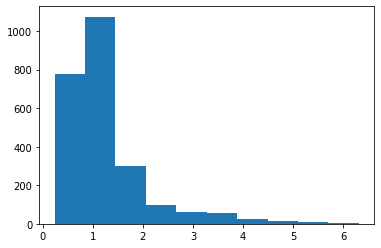

In [17]:
# Energy of neutrinos with a matched slice!!

# NOTE: one thing to keep in mind -- merge's make a cut on the physics

_ = plt.hist(matchdf["rec.mc.nu.E"])

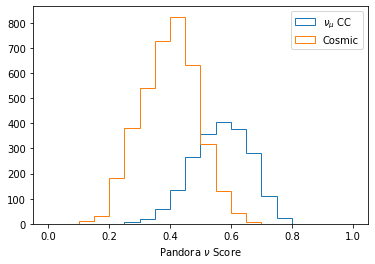

In [18]:
# Now we can look at an example slice variable -- the Pandora "nu" score

var = matchdf["rec.slc.nu_score"]

is_numu_cc = (np.abs(matchdf["rec.mc.nu.pdg"]) == 14) & (matchdf["rec.mc.nu.iscc"])
is_cosmic = (matchdf["rec.slc.tmatch.index"] < 0)
bins=np.linspace(0, 1, 21)
_ = plt.hist(var[is_numu_cc], bins=bins, histtype="step", label=r"$\nu_\mu$ CC")
_ = plt.hist(var[is_cosmic], bins=bins, histtype="step", label="Cosmic")
_ = plt.legend()
_ = plt.xlabel(r"Pandora $\nu$ Score")

In [20]:
# More complicated event selection stuff -- select a primary "Muon" track

# Using the algorithm from:
# https://sbn-docdb.fnal.gov/cgi-bin/private/RetrieveFile?docid=20139&filename=event_selection.pdf&version=2

# Now, using the trkdf
trkdf["trk_contained"] =\
    InFV(trkdf["rec.slc.reco.trk.start.x"], trkdf["rec.slc.reco.trk.start.y"], trkdf["rec.slc.reco.trk.start.z"]) &\
    InFV(trkdf["rec.slc.reco.trk.end.x"], trkdf["rec.slc.reco.trk.end.y"], trkdf["rec.slc.reco.trk.end.z"])

# check valid chi2 -- just look at collection plane for now
muon_chi2 = (trkdf["rec.slc.reco.trk.chi2pid.2.chi2_muon"] < 30.) &\
    (trkdf["rec.slc.reco.trk.chi2pid.2.chi2_proton"] > 60.)

# Valid primary track candidates
primary_track_candidate = (trkdf["trk_contained"] & muon_chi2 & (trkdf["rec.slc.reco.trk.len"] > 50.)) |\
        (trkdf["rec.slc.reco.trk.len"] > 100.)


primary_track = trkdf[primary_track_candidate]\
    .sort_values(["entry", "rec.slc..index", 'rec.slc.reco.trk.len'], ascending=[True, True, False])\
    .groupby(["entry", "rec.slc..index"]).head(1)

In [21]:
# Now, merge the primary track into the slice df
df = pd.merge(matchdf.reset_index(), primary_track,
              left_on=["entry", "rec.slc..index"], # match on spill then slice number
              right_on=["entry", "rec.slc..index"],
              how="inner", # only keep slices with a primary track
              validate="one_to_one", # Always validate when you can! Don't put two primary tracks in a slice -- this would double-count a slice
             )

Text(0.5, 0, 'Reconstructed Muon Momentum (Contained) [GeV/c]')

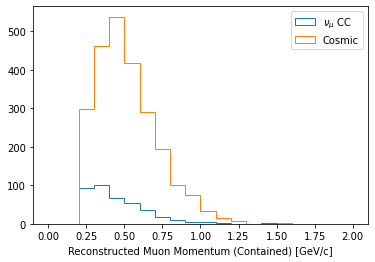

In [22]:
# Now we can compute more stuff! Like the primary track momentum

is_numu_cc = (np.abs(df["rec.mc.nu.pdg"]) == 14) & (df["rec.mc.nu.iscc"])
is_cosmic = (df["rec.slc.tmatch.index"] < 0)

# Muon range momentum for contained tracks
var = df["rec.slc.reco.trk.rangeP.p_muon"]
bins = np.linspace(0, 2, 21)
_ = plt.hist(var[is_numu_cc & df["trk_contained"]], bins=bins, histtype="step", label=r"$\nu_\mu$ CC")
_ = plt.hist(var[is_cosmic & df["trk_contained"]], bins=bins, histtype="step", label="Cosmic")
plt.legend()
plt.xlabel("Reconstructed Muon Momentum (Contained) [GeV/c]")

Text(0.5, 0, 'Reconstructed Muon Momentum (Exiting) [GeV/c]')

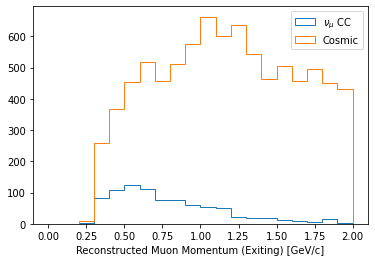

In [23]:
# And MCS for exiting tracks

var = df["rec.slc.reco.trk.mcsP.fwdP_muon"]
bins = np.linspace(0, 2, 21)
_ = plt.hist(var[is_numu_cc & np.invert(df["trk_contained"])], bins=bins, histtype="step", label=r"$\nu_\mu$ CC")
_ = plt.hist(var[is_cosmic & np.invert(df["trk_contained"])], bins=bins, histtype="step", label="Cosmic")
plt.legend()
plt.xlabel("Reconstructed Muon Momentum (Exiting) [GeV/c]")

Text(0.5, 0, 'Reconstructed Muon Momentum [GeV/c]')

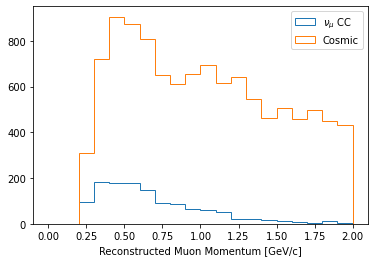

In [24]:
# Combine the two
recop = df["rec.slc.reco.trk.rangeP.p_muon"]+0. # copy
recop[np.invert(df["trk_contained"])] = df.loc[np.invert(df["trk_contained"]), "rec.slc.reco.trk.mcsP.fwdP_muon"]


var = recop
_ = plt.hist(var[is_numu_cc], bins=bins, histtype="step", label=r"$\nu_\mu$ CC")
_ = plt.hist(var[is_cosmic], bins=bins, histtype="step", label="Cosmic")
plt.legend()
plt.xlabel("Reconstructed Muon Momentum [GeV/c]")

Text(0.5, 0, 'Reconstructed Muon Momentum [GeV/c]')

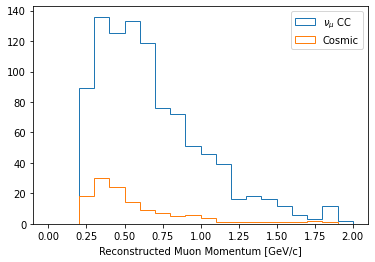

In [25]:
# Make some cuts!
passcut = (df["rec.slc.nu_score"] > 0.5) # Good nu score -- also rejects Clear-Cosmics (which have -1)

_ = plt.hist(var[is_numu_cc & passcut], bins=bins, histtype="step", label=r"$\nu_\mu$ CC")
_ = plt.hist(var[is_cosmic & passcut], bins=bins, histtype="step", label="Cosmic")
plt.legend()
plt.xlabel("Reconstructed Muon Momentum [GeV/c]")